# Week 3 Exercise: Second Virial Coefficient from Interatomic potentials. 


In this session we will investigate the emergence of non-idealities in the volumetri behavior of pure fluids by computing an expression of the P/v isotherm in the case of particles interacting with a square well potential, defined by the expression: $\Gamma_{ii}=0$ for $r>R\sigma$ ; $-\epsilon$ for $\sigma<r\leq{R}\sigma$ ; $\infty$ for $r \leq \sigma$

This potential is a function of three parameters: $\sigma$, $\epsilon$, and $R$. It is easy to see that for $\sigma, \epsilon \rightarrow {0}$ the behavior of the gas is ideal. 

The objective of this exercise is to estimate the deviation from the ideal Gas volumetric behavior at constant temperature, as a function of increasing values of $\sigma$, $\epsilon$, and $R$.

In solving the problem remember that the second order virial coefficient can be computed from $\Gamma_{ii}$ as: 

$$
B_{ii}=2\pi{N_A}\int_0^\infty\left(1-e^{-\Gamma_{ii}/kT}\right)r^2dr
$$


where: 

- $B_{ii}$ is the second order virial coefficient
- $N_A$ is the avogadro number
- $\Gamma_{ii}$ is the intermolecular potential between two molecules of specie $i$
- $k$ is the Boltzmann constant
- $T$ is the temperature 
- $r$ is the interparticle distance




### Solution Trace: 

To answer the question one needs to obtain an analytical expression for the second order Virial coefficient for the square-well potential, and then use the virial expansion of the compressibility factor (truncated at the second term), to investigate the deviation from ideality of the volumetric behavior of a fluid with these characteristics. 

$$
B_{ii}=2\pi{N_A}\left[\int_0^\sigma{r^2dr}+\left(1-e^\frac{\epsilon}{kT}\right)\int_\sigma^{R\sigma}{r^2dr}\right]
$$

which leads to: 

$$
B_{ii}=2\pi{N_A}\left(\left[\frac{r^3}{3}\right]_0^\sigma+\left(1-e^\frac{\epsilon}{kT}\right)\left[\frac{r^3}{3}\right]_\sigma^{R\sigma}\right)
$$

and, by introducing the constant $b_0=\frac{2}{3}\pi{N_A}\sigma^3$: 

$$
B_{ii}=b_0R^3\left(1-\frac{R^3-1}{R^3}e^\frac{\epsilon}{kT}\right)
$$




Now one can study what happens to $B_{ii}$ varying parameters $\sigma$, $R$, and $\epsilon$: 

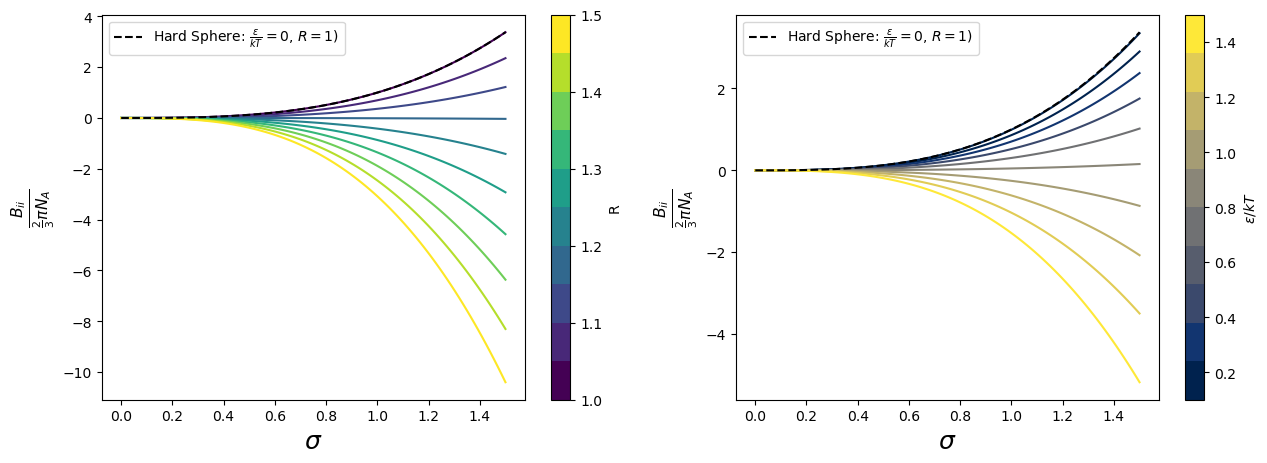

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")



sigma = np.linspace(0,1.5,100)
Bii = lambda b0, R, eps_kT: b0*R**3*(1-((R**3-1)/R**3)*np.exp(eps_kT))
b0 = lambda sigma: sigma**3


# Number of lines
n_lines = 10
colormap = cm.get_cmap('viridis', n_lines)
norm = mcolors.Normalize(vmin=1.00, vmax=1.5)

colormap2 = cm.get_cmap('cividis', n_lines)
norm2 = mcolors.Normalize(vmin=0.1, vmax=1.5)

# Create a figure and axis
fig, ax = plt.subplots(1,2,figsize=(15, 5))


for R_i in np.linspace(1.00,1.5,n_lines):
    ax[0].plot(sigma,Bii(b0(sigma),R_i,1.0),color=colormap(norm(R_i)));

for eps_kT_i in np.linspace(0.01,1.5,10):
     ax[1].plot(sigma,Bii(b0(sigma),1.2,eps_kT_i),color=colormap2(norm2( eps_kT_i)));

ax[0].plot(sigma,Bii(b0(sigma),1,0.0),'k--',label='Hard Sphere: $\\frac{\epsilon}{kT}=0$, $R=1$)');
ax[0].legend()
ax[1].plot(sigma,Bii(b0(sigma),1,0.0),'k--',label='Hard Sphere: $\\frac{\epsilon}{kT}=0$, $R=1$)');
ax[1].legend()

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax[0],label='R');
fig.colorbar(cm.ScalarMappable(norm=norm2, cmap=colormap2), ax=ax[1],label='$\epsilon/kT$');

ax[0].set_xlabel('$\sigma$',fontsize=18);
ax[0].set_ylabel('$\\frac{B_{ii}}{\\frac{2}{3}\pi{N_A}}$',fontsize=16);

ax[1].set_xlabel('$\sigma$',fontsize=18);
ax[1].set_ylabel('$\\frac{B_{ii}}{\\frac{2}{3}\pi{N_A}}$',fontsize=16);
